<a href="https://colab.research.google.com/github/DEBMALYAMAJUMDER/stock-forecast/blob/main/stock_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Data Collection
import pandas_datareader as pdr
key="6295bfe79f94d6871c8dd1b02a9125f8407d0fcc"

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key=key)


In [3]:
df.to_csv('AAPL.csv')


In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('AAPL.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-12-19 00:00:00+00:00,116.64,117.38,115.75,115.80,27779423,27.444482,27.618598,27.235072,27.246836,111117692,0.0,1.0
1,AAPL,2016-12-20 00:00:00+00:00,116.95,117.50,116.68,116.74,21424965,27.517422,27.646833,27.453893,27.468011,85699860,0.0,1.0
2,AAPL,2016-12-21 00:00:00+00:00,117.06,117.40,116.78,116.80,23783165,27.543305,27.623304,27.477423,27.482129,95132660,0.0,1.0
3,AAPL,2016-12-22 00:00:00+00:00,116.29,116.51,115.64,116.35,26085854,27.362130,27.413894,27.209190,27.376247,104343416,0.0,1.0
4,AAPL,2016-12-23 00:00:00+00:00,116.52,116.52,115.59,115.59,14249484,27.416247,27.416247,27.197425,27.197425,56997936,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-12-09 00:00:00+00:00,174.56,176.75,173.9200,174.910,108923739,174.56,176.75,173.9200,174.910,108923739,0.0,1.0
1253,AAPL,2021-12-10 00:00:00+00:00,179.45,179.63,174.6900,175.205,115402731,179.45,179.63,174.6900,175.205,115402731,0.0,1.0
1254,AAPL,2021-12-13 00:00:00+00:00,175.74,182.13,175.5300,181.115,153237019,175.74,182.13,175.5300,181.115,153237019,0.0,1.0
1255,AAPL,2021-12-14 00:00:00+00:00,174.33,177.74,172.2100,175.250,139380382,174.33,177.74,172.2100,175.250,139380382,0.0,1.0
1256,AAPL,2021-12-15 00:00:00+00:00,179.30,179.50,172.3108,175.110,131063257,179.30,179.50,172.3108,175.110,131063257,0.0,1.0


In [8]:
df1=df.reset_index()['close']

In [9]:
print(df1)

0       116.64
1       116.95
2       117.06
3       116.29
4       116.52
         ...  
1252    174.56
1253    179.45
1254    175.74
1255    174.33
1256    179.30
Name: close, Length: 1257, dtype: float64


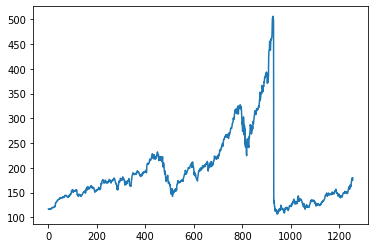

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)


In [11]:
import numpy as np

In [12]:
df1

0       116.64
1       116.95
2       117.06
3       116.29
4       116.52
         ...  
1252    174.56
1253    179.45
1254    175.74
1255    174.33
1256    179.30
Name: close, Length: 1257, dtype: float64

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


In [14]:
#new df1
print(df1)

[[0.02454602]
 [0.02532248]
 [0.025598  ]
 ...
 [0.17257358]
 [0.16904195]
 [0.18149029]]


In [15]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [16]:
training_size,test_size

(879, 378)

In [17]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=90,batch_size=64,verbose=1)


Epoch 1/90
13/13 [==============================] - 17s 595ms/step - loss: 0.0196 - val_loss: 0.0020
Epoch 2/90
13/13 [==============================] - 4s 337ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 3/90
13/13 [==============================] - 5s 366ms/step - loss: 0.0018 - val_loss: 8.5701e-04
Epoch 4/90
13/13 [==============================] - 4s 305ms/step - loss: 0.0012 - val_loss: 2.2754e-04
Epoch 5/90
13/13 [==============================] - 4s 324ms/step - loss: 9.5824e-04 - val_loss: 2.1930e-04
Epoch 6/90
13/13 [==============================] - 2s 173ms/step - loss: 9.0802e-04 - val_loss: 3.6898e-04
Epoch 7/90
13/13 [==============================] - 2s 171ms/step - loss: 8.3054e-04 - val_loss: 2.0424e-04
Epoch 8/90
13/13 [==============================] - 2s 170ms/step - loss: 7.8908e-04 - val_loss: 1.9378e-04
Epoch 9/90
13/13 [==============================] - 2s 170ms/step - loss: 8.6326e-04 - val_loss: 2.1294e-04
Epoch 10/90
13/13 [==============================] 

In [24]:
import tensorflow as tf

In [25]:
tf.__version__


'2.7.0'

In [26]:
# Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [27]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [28]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


213.34967968861807

In [29]:
# Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))


138.43252001730633

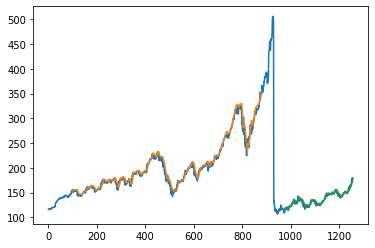

In [30]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [31]:
len(test_data)

378

In [32]:
x_input=test_data[278:].reshape(1,-1)
x_input.shape


(1, 100)

In [33]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [34]:
temp_input


[0.10001252348152784,
 0.0955291170945522,
 0.09718221665623034,
 0.0977332498434565,
 0.09688165309956165,
 0.10149029430181589,
 0.10046336881653095,
 0.10073888541014397,
 0.09843456480901686,
 0.0983093299937382,
 0.09708202880400746,
 0.0977332498434565,
 0.10532247964934244,
 0.10584846587351276,
 0.11090795241077017,
 0.10857858484658728,
 0.09898559799624296,
 0.09983719474013769,
 0.10356919223544142,
 0.10737633061991231,
 0.10715090795241072,
 0.10399499060738887,
 0.101941139636819,
 0.1045961177207263,
 0.11591734502191609,
 0.11268628678772696,
 0.11438948027551654,
 0.11724483406386971,
 0.11887288666249218,
 0.12485911083281148,
 0.12090169067000628,
 0.11829680651221036,
 0.1055228553537883,
 0.10697557921102063,
 0.10339386349405133,
 0.10567313713212267,
 0.10507201001878513,
 0.09823418910457105,
 0.0904195366311834,
 0.0916468378209142,
 0.09770820288040072,
 0.10016280525986221,
 0.10038822792736374,
 0.09650594865372569,
 0.08783969943644326,
 0.09014402003757044

In [35]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


[0.17482929]
101
1 day input [0.09552912 0.09718222 0.09773325 0.09688165 0.10149029 0.10046337
 0.10073889 0.09843456 0.09830933 0.09708203 0.09773325 0.10532248
 0.10584847 0.11090795 0.10857858 0.0989856  0.09983719 0.10356919
 0.10737633 0.10715091 0.10399499 0.10194114 0.10459612 0.11591735
 0.11268629 0.11438948 0.11724483 0.11887289 0.12485911 0.12090169
 0.11829681 0.10552286 0.10697558 0.10339386 0.10567314 0.10507201
 0.09823419 0.09041954 0.09164684 0.0977082  0.10016281 0.10038823
 0.09650595 0.0878397  0.09014402 0.08681277 0.08969317 0.08090169
 0.08583594 0.08806512 0.09129618 0.09031935 0.09009393 0.08683782
 0.085335   0.09247339 0.09517846 0.09946149 0.10499687 0.10624922
 0.10680025 0.10482154 0.10469631 0.1063995  0.10522229 0.11453976
 0.10760175 0.10549781 0.10815279 0.11183469 0.1105072  0.1113087
 0.10920476 0.1101315  0.10289292 0.10276769 0.10807765 0.10810269
 0.11060739 0.11684408 0.12781465 0.13452724 0.13570445 0.13668128
 0.13800877 0.12515967 0.13375078 

In [36]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


In [40]:
len(df1)

1257

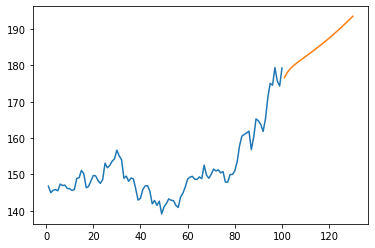

In [41]:
import matplotlib.pyplot as plt
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

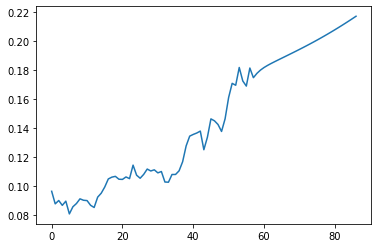

In [42]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

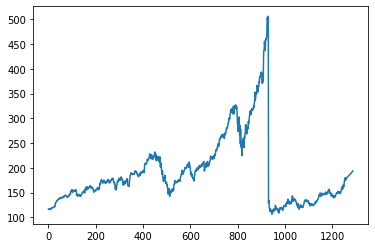

In [43]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)